In [157]:
import pandas as pd 
import re

In [158]:
f = open('SMSSpamCollection' , 'r' , encoding='utf-8')
data = f.read()

In [159]:
pat1 = "(ham)|(spam)"
splitd_data = re.split(pat1 , data)[1:]

In [160]:
clas = []
mail = []
for i in range(len(splitd_data)):
    if i%3 ==1 or i%3==0:
        if not splitd_data[i]==None:
            clas.append(splitd_data[i])
    if i%3 == 2:
        mail.append(splitd_data[i].strip('\t').strip('\n'))

In [161]:
df = pd.DataFrame({  "text":mail , "target":clas })

In [162]:
df.sample(10)

,text,target
2435,Lmao but its so fun...,ham
2850,"Ya they are well and fine., BBD(pooja) full pi...",ham
4692,I send the print outs da.,ham
1673,Dunno cos i was v late n when i reach they ins...,ham
725,S'fine. Anytime. All the best with it.,ham
5371,When you guys planning on coming over?,ham
3851,Let's pool our money together and buy a bunch ...,ham
5137,You have 1 new message. Please call 08715205273,spam
1872,I'll let you know when it kicks in,ham
2514,Ola would get back to you maybe not today but ...,ham


In [163]:
from sklearn.preprocessing import LabelEncoder 

In [164]:
encoder = LabelEncoder()

In [165]:
df.target = encoder.fit_transform(df['target'])

In [166]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0



# 2. EDA

In [167]:
df['target'].value_counts()

target
0    4851
1     748
Name: count, dtype: int64

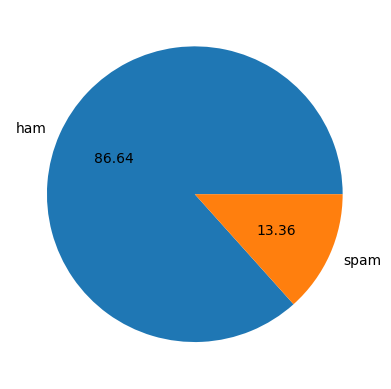

In [168]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts() , labels=['ham' , 'spam'] , autopct='%0.2f')
plt.show()

# Data is Imbalanced



In [169]:
import nltk

In [170]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bannu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [171]:
df['num_characters']=df['text'].apply(len)

In [172]:
df

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5594,This is the 2nd time we have tried 2 contact u...,1,160
5595,Will ü b going to esplanade fr home?,0,36
5596,"Pity, * was in mood for that. So...any other s...",0,57
5597,The guy did some bitching but I acted like i'd...,0,125


In [173]:
# Fetch Number Of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [174]:
#  Sentnce
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [175]:
df

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5594,This is the 2nd time we have tried 2 contact u...,1,160,35,4
5595,Will ü b going to esplanade fr home?,0,36,9,1
5596,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5597,The guy did some bitching but I acted like i'd...,0,125,27,1


In [176]:
df[['num_characters',	'num_words',	'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5599.000000,5599.000000,5599.000000
mean,80.105376,18.772102,2.001429
std,59.755411,13.825413,1.536852
min,1.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [177]:
df[df['target']==1][['num_characters',	'num_words',	'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,748.000000,748.000000,748.000000
mean,138.207219,27.906417,3.030749
std,29.449862,6.958997,1.548974
min,6.000000,1.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [178]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

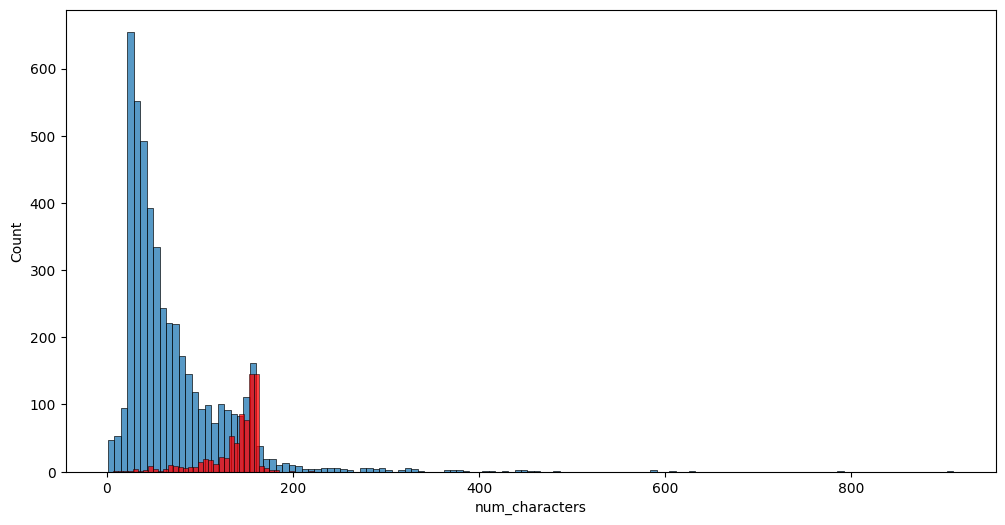

In [179]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='r')

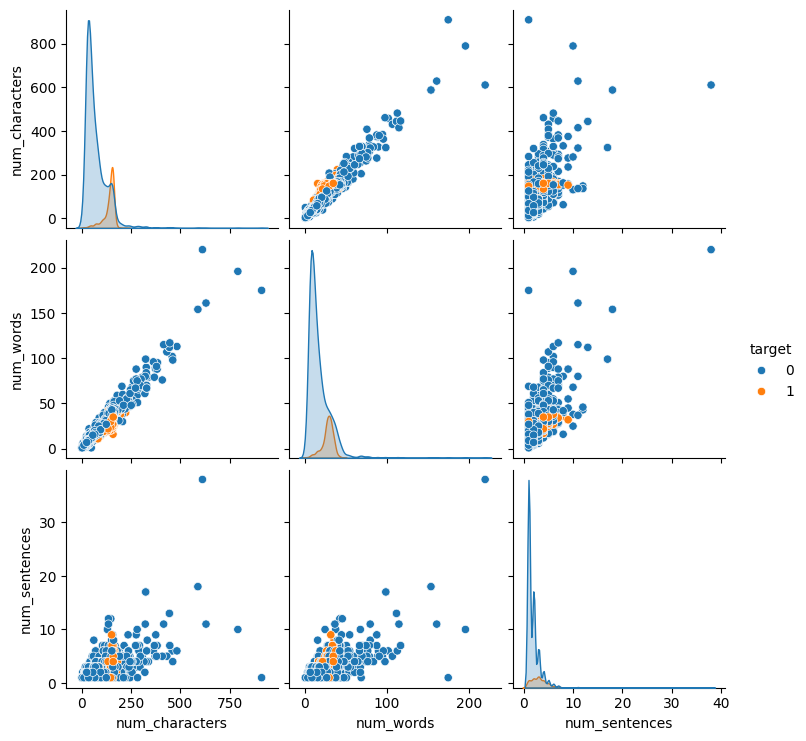

In [180]:

sns.pairplot(df,hue='target')

# Data Preprocessing
- Lower case
- Tokenization
- Removing special character 
- Removing Stop words and Punctuation 
- Stemming

In [181]:
# from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bannu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [182]:
# import string
# string.punctuation

In [183]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [184]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [185]:
transform_text(df.text[8])


'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour'

In [186]:

df['transform_text'] = df['text'].apply(transform_text)

In [187]:
df

,text,target,num_characters,num_words,num_sentences,transform_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5594,This is the 2nd time we have tried 2 contact u...,1,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5595,Will ü b going to esplanade fr home?,0,36,9,1,ü b go esplanad fr home
5596,"Pity, * was in mood for that. So...any other s...",0,57,15,2,piti mood suggest
5597,The guy did some bitching but I acted like i'd...,0,125,27,1,guy bitch act like interest buy someth els nex...


In [188]:
from wordcloud import WordCloud
wc = WordCloud(height=500 , width=500 , min_font_size=10 , background_color='white')

In [193]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '))

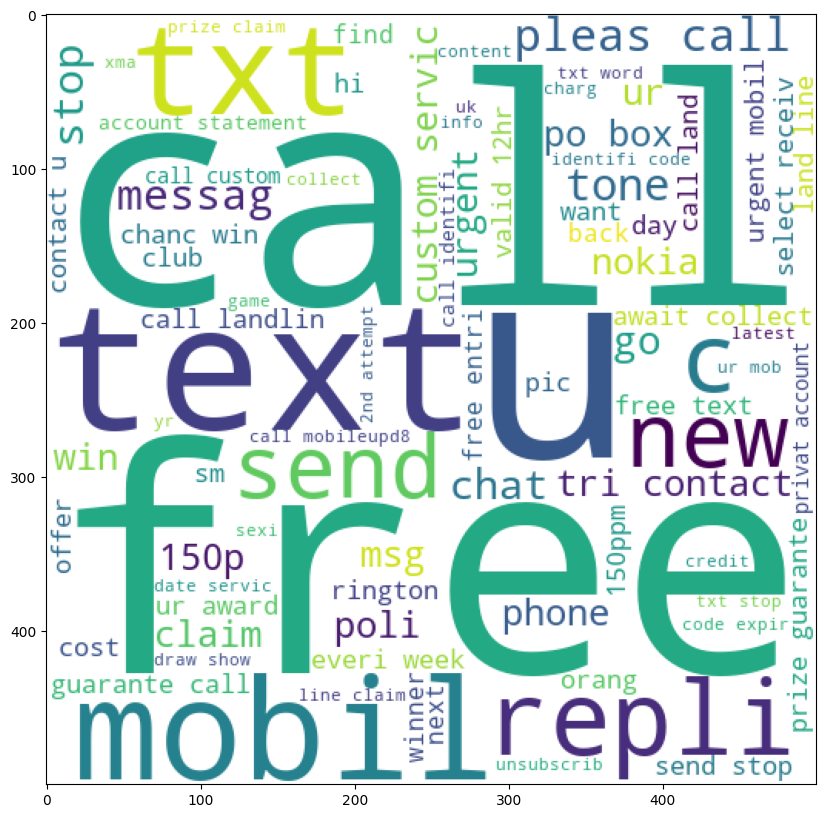

In [198]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [199]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=' '))

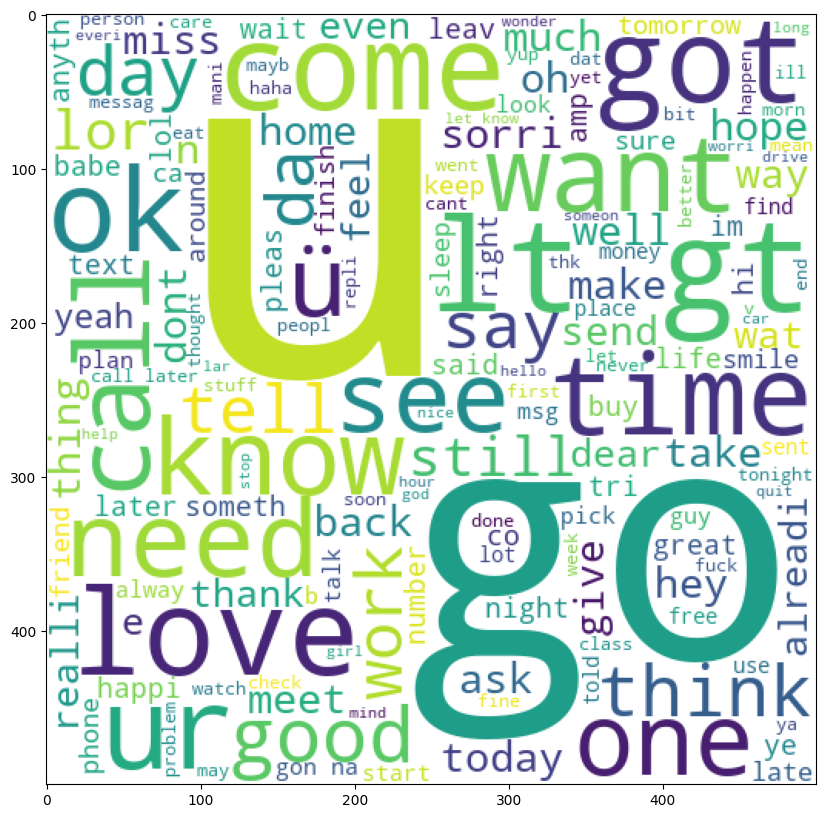

In [200]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [219]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [223]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

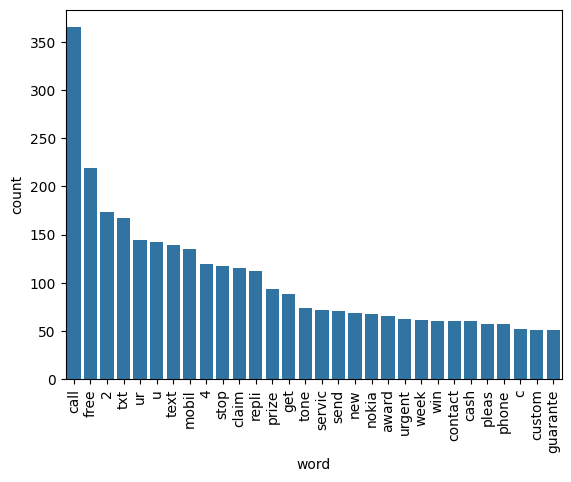

In [246]:
from collections import Counter

spam_counter = Counter(spam_corpus)

# Get the 30 most common words and their counts
most_common_words = spam_counter.most_common(30)

# Convert to a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [250]:
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

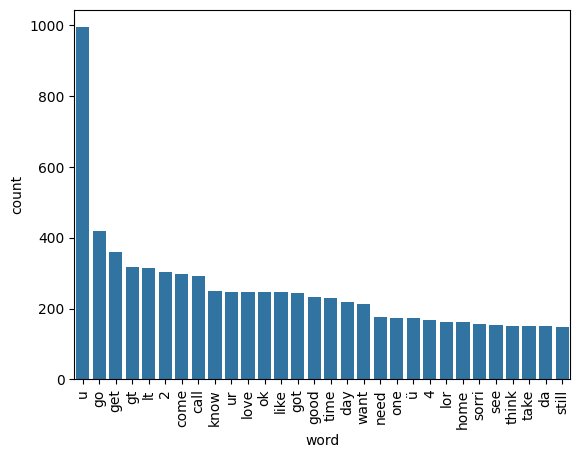

In [251]:
from collections import Counter

ham_counter = Counter(ham_corpus)

# Get the 30 most common words and their counts
most_common_words = ham_counter.most_common(30)

# Convert to a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

#  4. Model Building

In [294]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [295]:
X = tfidf.fit_transform(df['transform_text']).toarray()
y = df['target'].values

In [296]:
X.shape

(5599, 6780)

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train,X_test , y_train ,y_test = train_test_split(X,y , test_size=0.2,random_state=2)

In [299]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [300]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [301]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1).round(2))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1).round(2))

0.88
[[862 125]
 [ 15 118]]
0.49


In [302]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2).round(2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2).round(2))

0.97
[[987   0]
 [ 30 103]]
1.0


In [303]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3).round(2))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3).round(2))

0.98
[[984   3]
 [ 20 113]]
0.97
